# Bivariate Analysis with Seaborn

Firstly, we import the necessary libraries and load the penguins dataset as 'penguins'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
penguins = pd.read_csv('../../../Data/csv/penguins.csv')

In [3]:
# Take a look at the first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Drop missing values
penguins.dropna(inplace = True)

# 1. Categorical variables

If you want to visualize data involving categorical variables, you can choose between 2 different plotting approaches as we already saw in the preceding notebook: 

a) The `catplot()` plotting function 

- this is a Figure-level interface that allows you to plot categories
- by calling this function, `a stripplot` will be drawn by default
  
Important note: specifying data

- data you want to visualize must be passed in a long-form DataFrame 
- categorical and numerical variables must be passed as strings to the `x` and `y` parameters in the following way:   
  ```sns.catplot(data = dataset, x = 'categorical_variable', y = 'numerical_variable')```
  

- In comparison, the code below won't work:  
  ```sns.catplot(x = data['categorical_variable'], y = data['numerical_variable'])```
  
The `catplot()` functions provides us with access to other Axes-level plotting functions which you can select by passing the respective plot kind to the `kind` parameter:

- "box", "swarm", "strip", "violin", "barplot", etc. 
  

b) Axes-level plotting functions
- `sns.boxplot()`
- `sns.swarmplot()`
- `sns.stripplot()`
- `sns.violinplot()`
- `sns.countplot()`
- `sns.barplot()`, etc.

## 1.1 Categorical vs. Numerical feature

One thing you could be interested in is to find out how the distribution of a numerical feature varies across different categories. For this purpose you can use a plotting functions such `sns.boxplot()`, `sns.violinplot()`, `sns.boxenplot()`.

### 1.1.1 Boxplot

Inside the function for creating the boxplots we specify the dataset and the feature names. The categorical variable 'species' will be plotted on the x-axis and the respective values of 'body_mass_g' on the y-axis.

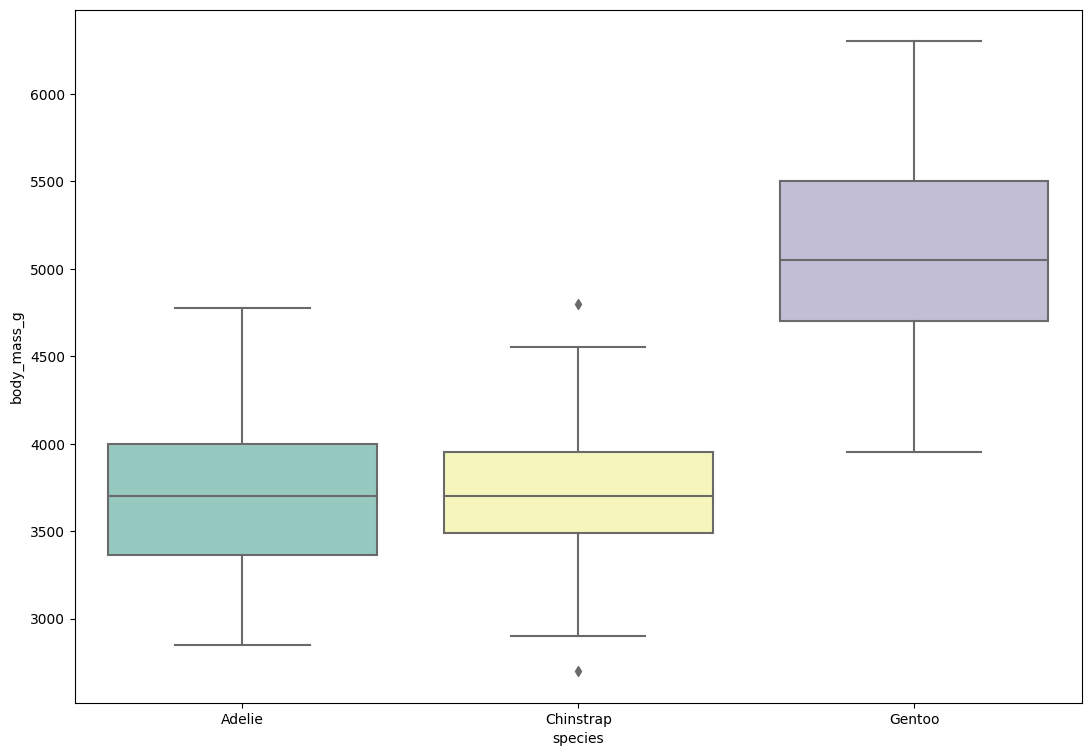

In [5]:
# Boxplots of body mass of penguins based on the species
plt.figure(figsize = (13,9))
sns.boxplot(data = penguins, 
            x = 'species', 
            y = 'body_mass_g', 
            palette = 'Set3');

Visualization of the distribution reveals us interesting differences and similarities among species. For Adelie and Chinstrap, the majority of penguins weigh up to approximately 4000 grams, although the Chinstrap weight range is smaller than that of Adelie penguins. These two species have also the same median value of 3700 grams (we also verified median values in the code cell below). In case of Chinstrap penguins some outliers are present which can indicate that some penguins weight significantly less or more compared to the rest of observations. Gentoo penguins are overall heavier, while the vast majority of penguins weigh about 4700-5500 grams. This species also has the highest range of recorded values.  

In [6]:
# Median values of Adelie and Chinstrap species
print('Adelie body mass-median value: ', penguins[penguins.species == 'Adelie'].body_mass_g.median(),
      '\n'
      'Chinstrap body mass-median value: ', penguins[penguins.species == 'Chinstrap'].body_mass_g.median())

Adelie body mass-median value:  3700.0 
Chinstrap body mass-median value:  3700.0


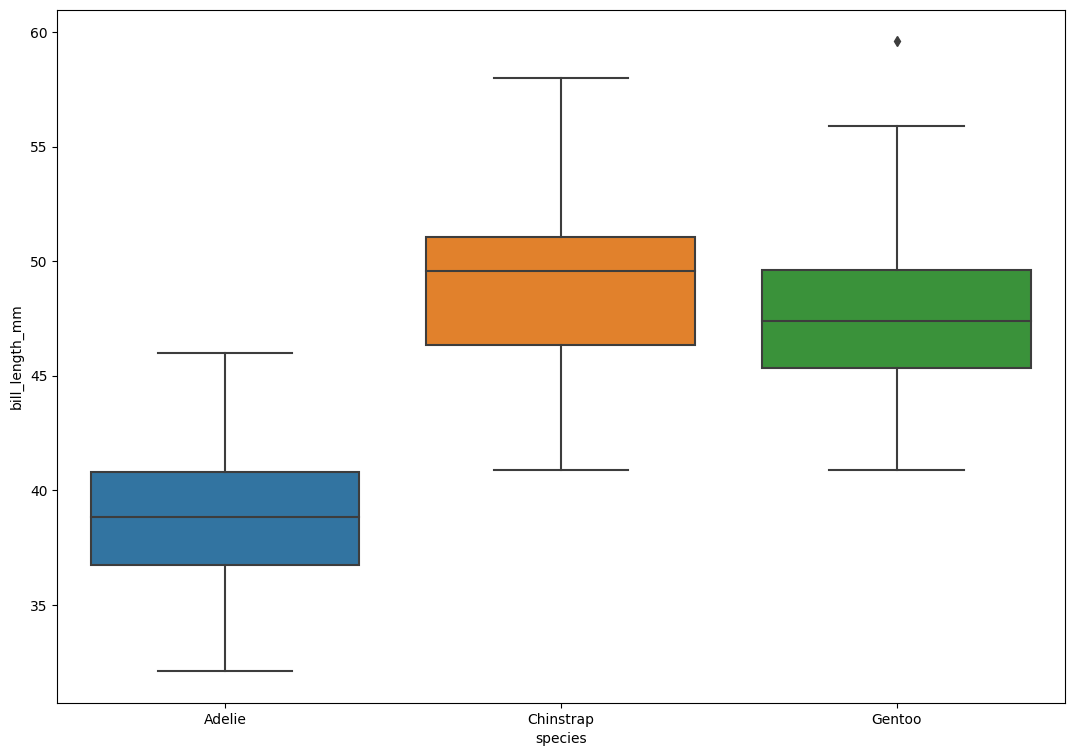

In [7]:
# Boxplots of the bill length based on the species
plt.figure(figsize = (13,9))
sns.boxplot(data = penguins, 
            x = 'species', 
            y = 'bill_length_mm');

From the boxplots we can say that the Adelie species is characterised by the shortest bills, while most penguins have a bill which is about 37-41 millimeter long. The bill length of the Chinstrap and Gentoo species starts at about 41 mm. If we do not take into account the outlier of the Gentoo species, this species does have shorter bills compared to Chinstrap penguins.

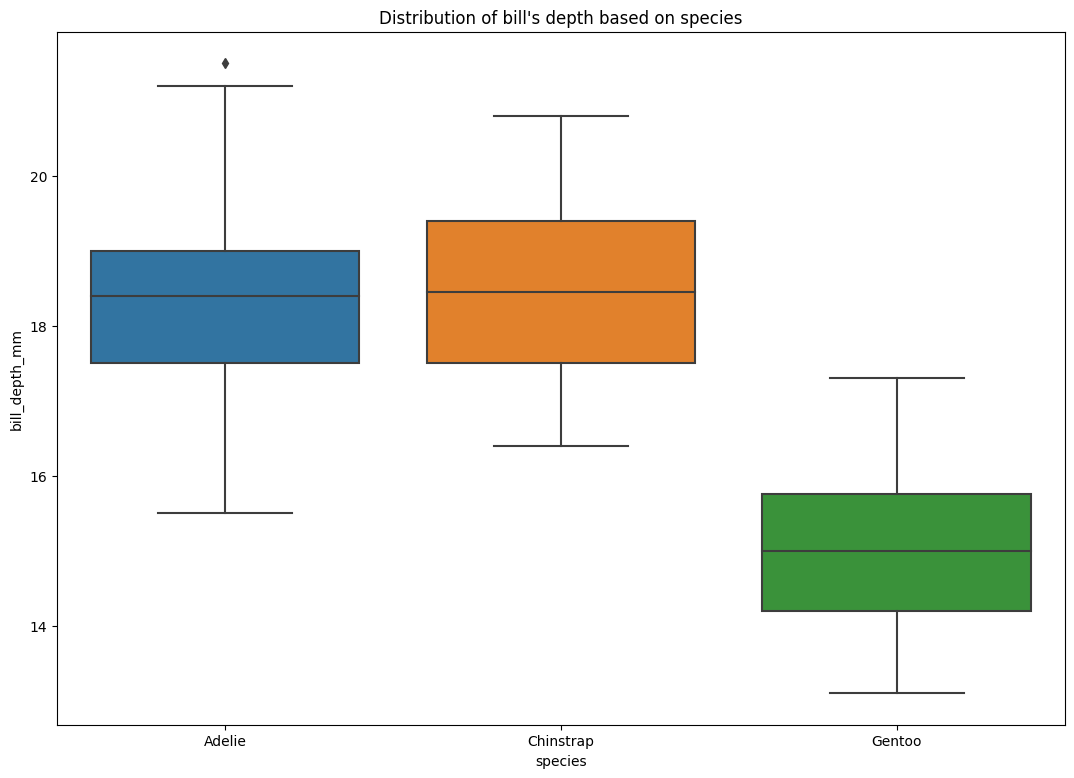

In [8]:
# TASK 1 >>> Create boxplots of the depth of the bills based on species
#        >>> Set a the figure size to (13,9)
#        >>> Set the title to 'Distribution of bill's depth based on species'

plt.figure(figsize = (13,9))
sns.boxplot(data = penguins, 
            x = 'species', 
            y = 'bill_depth_mm')
plt.title("Distribution of bill's depth based on species");

> What can you say about those 3 species in term of the bill depth? How does the distribution differ ? What about the range of values? What species has the smallest bill depth range?

### 1.1.2 Swarmplot

We can also take a closer look at the three islands where the penguins live. Since our dataset does not comprise too many observations, the data points are nicely plotted.

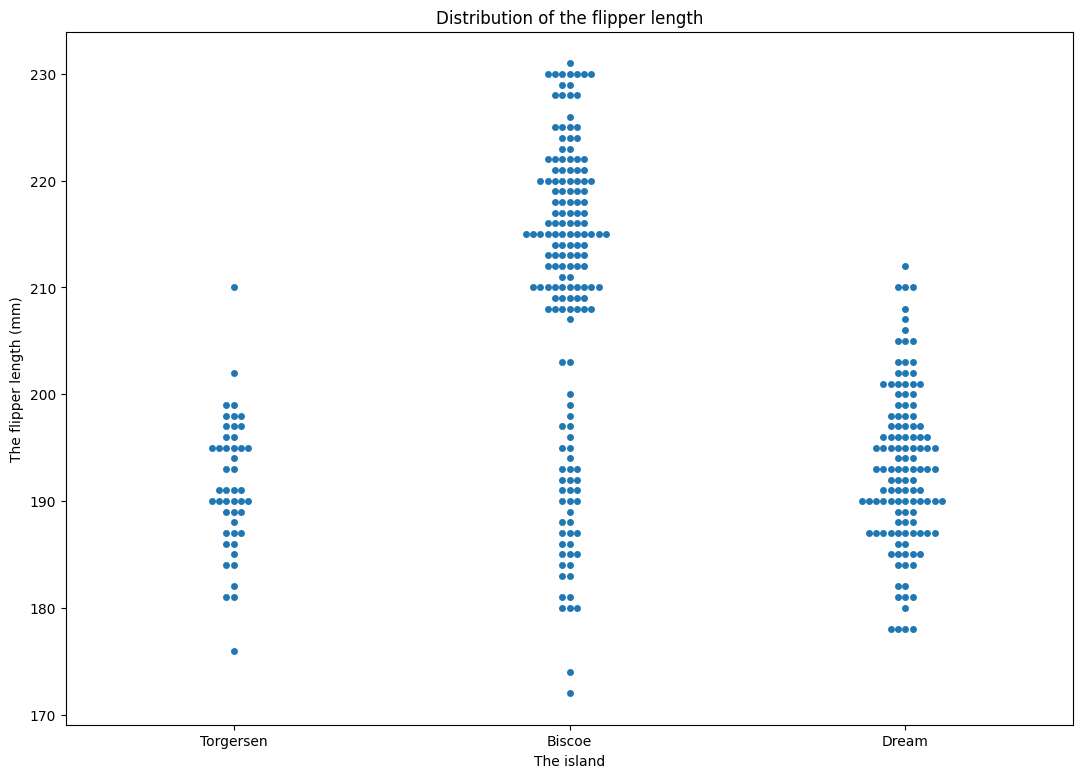

In [9]:
# Swarmplot of the flipper length based on islands

plt.figure(figsize = (13,9))
ax = sns.swarmplot(data = penguins, 
              x = 'island', 
              y = 'flipper_length_mm')
ax.set(title = 'Distribution of the flipper length', # Accessing Axes object and setting title and labels using .set()
       xlabel = 'The island',
       ylabel = 'The flipper length (mm)');

Now we see the distribution of the penguins' flipper length on the three islands, but this plot does not provide us any specific and useful information. We can say only, for example, there are penguins with either really short flippers or vast majority of penguins have long flippers about 215 milimeters on Biscoe island. 

Let's explore what species are actually present on the particular islands.

In [10]:
# Group data based on island and count penguins

penguins.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: species, dtype: int64

Interestingly, Adelie species inhabit all three islands. Gentoo penguins are present only in Biscoe island and Chinstrap's home is Dream island. Let's filter the dataset only for Gentoo and Chinstrap penguins.

The filtering approach is up to you. You can create a subset of a DataFrame with specific rows based on a condition using indexing like in this example:   
```subset = data['weight'] == 85```

This operation checks for whether the row contains the value 85 and returns only those rows where this condition is fulfilled.

Another option is to use `query` which we apply onto the DataFrame. We specify that we want to filter only those rows where Gentoo and Chinstrap penguins are present as species. Since we filter for more than one condition, these species must by passed as a list. We use the `in` keyword which checks whether a species is present in the list.


Choose the approach which best suits you. Here we included both of them for you to compare the code syntax.

In [11]:
# Filtering only Gentoo and Chinstrap species using Pandas query

penguins_filter = penguins.query('species in ["Gentoo","Chinstrap"]')

In [12]:
# Filtering only Gentoo and Chinstrap species using indexing

penguins_fil = penguins[penguins['species'].isin(["Gentoo","Chinstrap"])]

In [13]:
# The new DataFrame penguins_filter will be returned as an output

penguins_filter.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE


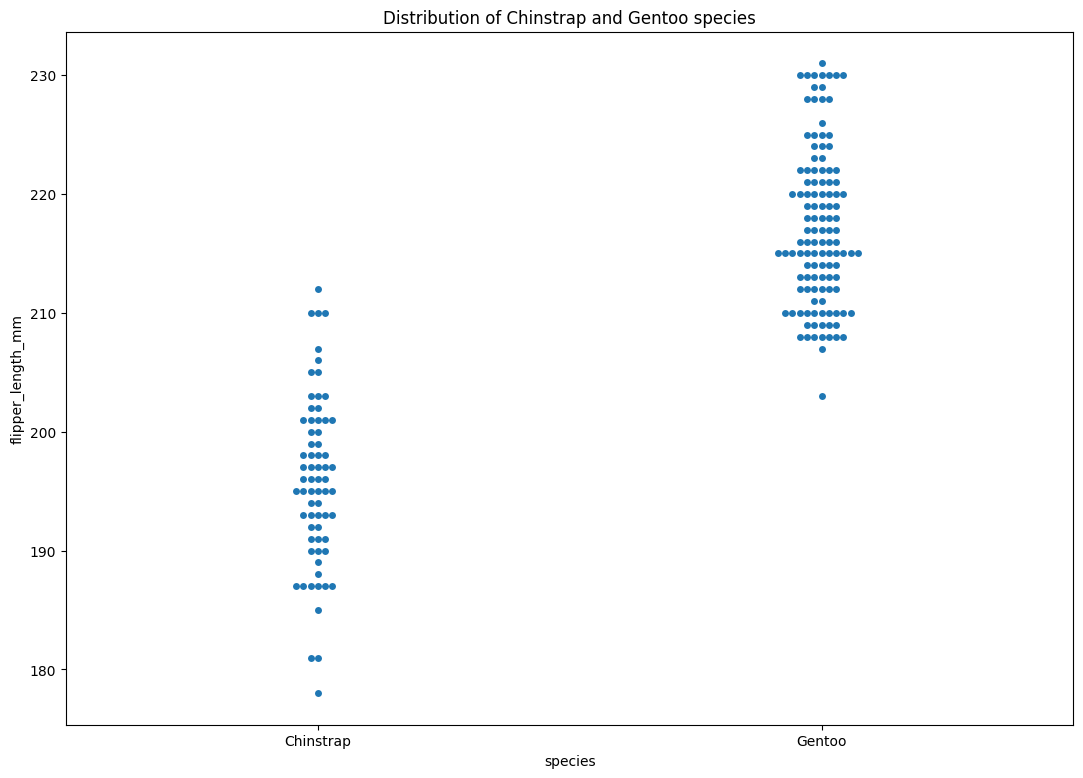

In [14]:
# TASK 2 >>> Create a swarmplot using the created penguins_filter subset
#        >>> Set the figure size to (13,9)
#        >>> Visualize the flipper length based on the Chinstrap and Gentoo species
#        >>> Set the title to 'Distribution of Chinstrap and Gentoo species'using plt.title()

plt.figure(figsize=(13,9))
sns.swarmplot(data = penguins_filter, 
              x = 'species', 
              y = 'flipper_length_mm')
plt.title('Distribution of Chinstrap and Gentoo species');

### 1.1.3 Stripplot

As you already learned how to create a stripplot, try the following exercise of visualizing Adelie species flipper length distribution based on the category  'sex'.

In [15]:
# Filter only for the Adelie species and save it as adelie_filter
adelie_filter = penguins.query('species == "Adelie"')

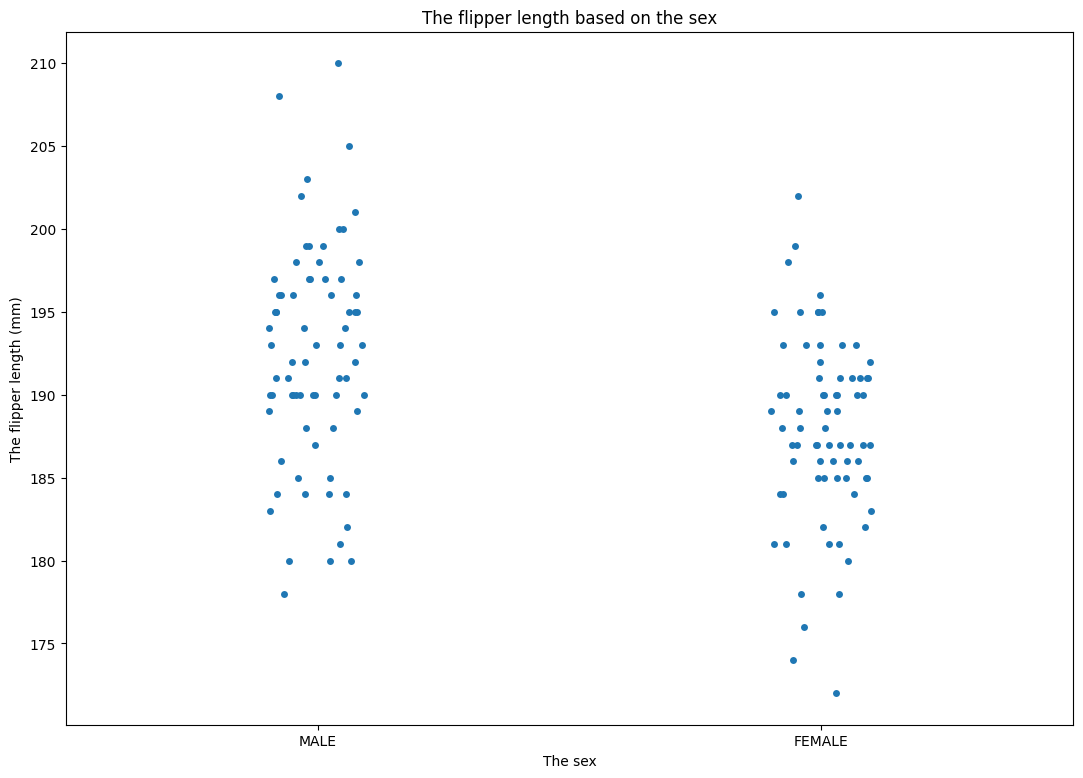

In [16]:
# TASK 3 >>> Visualize Adelie's flipper length distribution using swarmplot based on 'sex'
#        >>> Set the figure size to (13,9)
#        >>> Store the output of the stripplot to the ax variable
#        >>> Set the following using ax.set(): 
#            title: 'The flipper length based on the sex'
#            x-axis label: 'The sex'
#            y-axis label: 'The flipper length (mm)'

plt.figure(figsize=(13,9))
ax = sns.stripplot(data = adelie_filter, 
                   x = 'sex', 
                   y = 'flipper_length_mm')

ax.set(title = 'The flipper length based on the sex',
       xlabel = 'The sex',
       ylabel = 'The flipper length (mm)');

### 1.1.4 Violinplot

Categories can be nicely compared using a violinplot which shows statistics from a boxplot and the shape of the distribution that comes from a density plot. A violinplot is a good choice for plotting the distribution when visualizing a large number of observations is not sufficient due to data points overlapping.

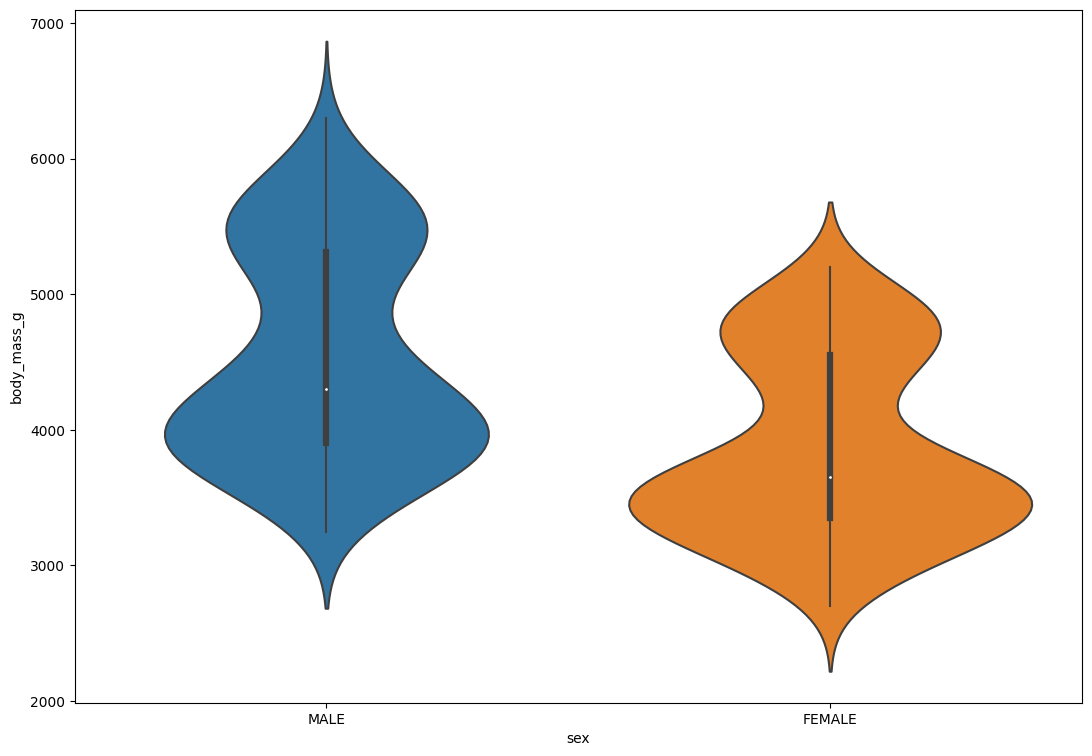

In [17]:
# A violinplot of the 'body_mass_g' feature

plt.figure(figsize = (13,9))
sns.violinplot(data = penguins, 
               x = 'sex', 
               y = 'body_mass_g');

A violinplot consists of boxplot that is displayed in the middle. The thick black bar represents the majority of values (IQR) and the white dot is the median value. Thin black lines represent the rest of data points. There shape of distribution is displayed on each side. 
The interpretation of a violinplot is similar to that of a swarmplot. Wider parts represent higher frequency of observations, while thinner parts denote less observations. You can notice that most male penguings have a weight of about 4000 grams and are generally heavier than females.

---

Please, see the [documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html) for specifying other parameters.

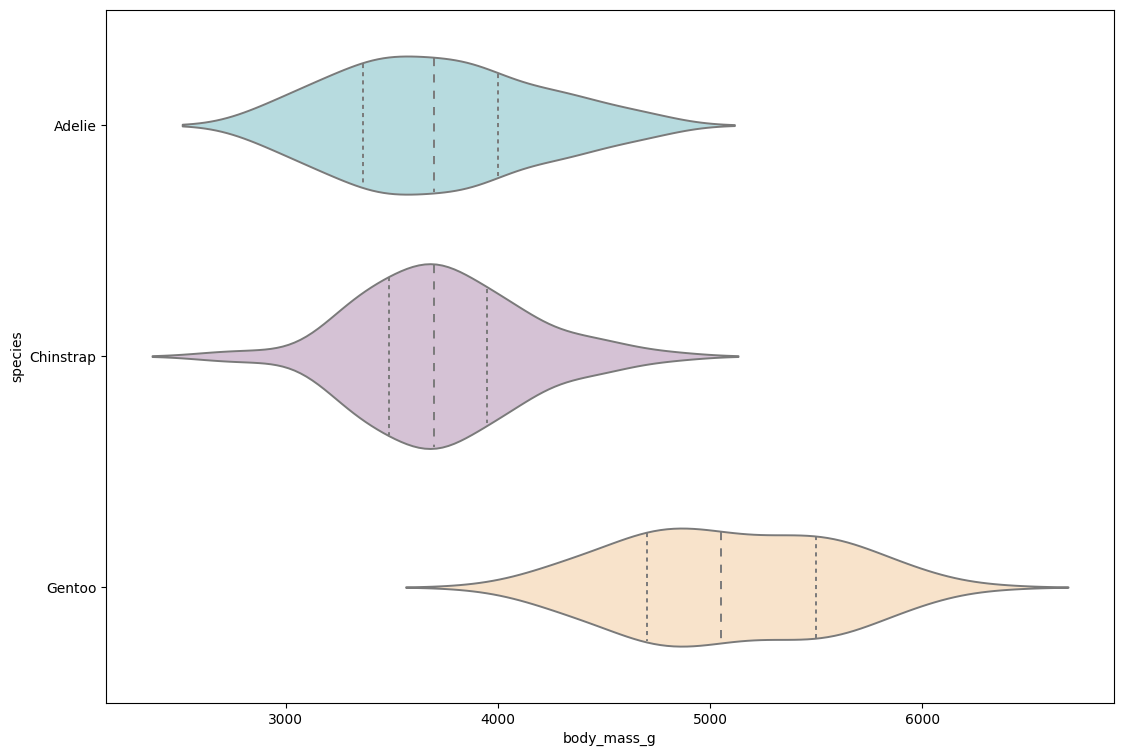

In [18]:
# A violin plot of 'body_mass_g' variable based on 'species'

color = {'Adelie':'powderblue','Chinstrap':'thistle','Gentoo':'bisque'}
plt.figure(figsize = (13,9))
ax = sns.violinplot(data = penguins, 
                    x = 'body_mass_g', 
                    y = 'species',
                    inner = 'quartile',
                    linewidth = 1.4,
                    palette = color);

### 1.1.5 Displot

We can also compare the spread of the values using a histogram.

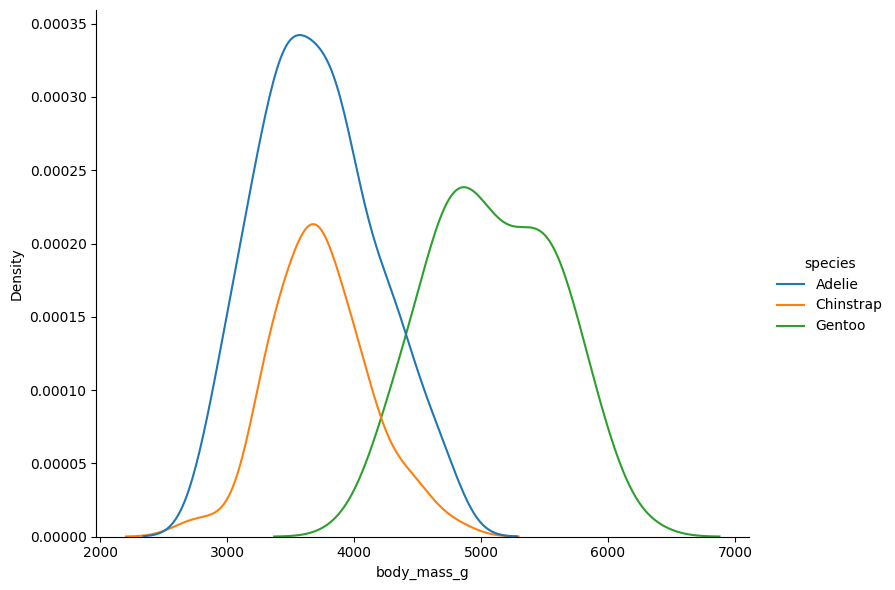

In [21]:
# A displot of 'body_mass_g' feature based on 'species'

sns.displot(data = penguins, 
            x='body_mass_g', 
            hue = 'species', 
            kind = 'kde',
            height = 6, 
            aspect = 1.3);

## 1.2 Categorical vs. categorical feature

With a countplot we are able to count the number of observations in each catogory and then compared how these values vary across categories. 

Let's visualize how many female and male penguins are present in each species.

In [ ]:
# A countplot of male and females penguins based on species
plt.figure(figsize = (13,9))
bars = sns.countplot(data = penguins, x = 'species', hue = 'sex', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = '', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('Species', fontsize = 13);      

# 2. Numerical vs. numerical feature

During bivariate analysis of two numerical variables we attempt to determine any relationship between them.

## 2.1 Relplot

Seaborn's `replot()` plotting function creates a relational plot. The output of this function is a FacetGrid object which allows to extend the existing plot in several ways, for instance adding another subplot or adding a subset of the data to visually display various categories. These options will be discussed in the last notebook about Multivariate analysis.

It is also possible to choose the method of visualizing statistical relationship using `kind` parameter:
- `kind = 'scatter'` - by default
- `kind = 'line` 

For now let's focus on creating a default relational plot comparing 2 numerical variables at once. We specify input dataset to `data` parameter and assign numerical variables as strings to `x` and `y`. 

In [ ]:
# Relationship between body mass and the flipper length

rel = sns.relplot(data = penguins, 
                  x = 'body_mass_g', 
                  y = 'flipper_length_mm',
                  color = 'grey',
                  height = 6, 
                  aspect = 1.3)
rel.set(xlabel = 'Body mass (g)', 
        ylabel = 'Flipper length (mm)');

The above plot shows the relationship between penguin's body mass and the flipper length. We can see that these two characteristics are strongly related with each other. The clear pattern indicates that with increasing body mass also the flipper length increases. 

In [ ]:
# Relationship between body mass and bill length 

rel = sns.relplot(data = penguins, 
                  x = 'body_mass_g', 
                  y = 'bill_length_mm', 
                  color = 'cadetblue',
                  height = 6, 
                  aspect = 1.3)
rel.set(xlabel = 'Body mass (g)', 
        ylabel = 'The bill depth (mm)');

Again, we can observe some kind of relationship between body mass and bill length. You can notice that penguins that weight about 3500 grams tend to have either a short bill (roughly about 35-40 mm), or a longer bill (above 45 mm). After a weight of about 4500 grams, the relationship becomes somewhat stronger and with increasing body mass, the bill length is longer. At this point we would need to take a closer look at the relationship by implementing some kind of visual semantic to gain more information from the data.

In [ ]:
# TASK 4 >>> Create a relplot to visualize the relationship between the 'bill_length_mm' and the 'bill_depth_mm' features
#        >>> Set parameters: height = 6, aspect = 1.3
#        >>> Set x-axis: 'The bill length (mm)'
#        >>> Set y-axis label: 'The bill depth (mm)'

sns.relplot(data = penguins, 
            x = 'bill_length_mm', 
            y = 'bill_depth_mm',
            height = 6, 
            aspect = 1.3)
plt.xlabel('The bill length (mm)')
plt.ylabel('The bill depth (mm)');

> What can you say about this relationship ?
Does the bill length relate to the bill depth? 
Is there some indication about a strong relationship or do you barely see any patterns ?  

## 2.2 Scatterplot

Another option to create a relational plot is using axes-level function `scatterplot()`. 

In [ ]:
# Relationship between 'body_mass_g' and 'flipper_length_mm'
plt.figure(figsize = (13,9))
sns.scatterplot(data = penguins, 
                x = 'body_mass_g', 
                y = 'flipper_length_mm', 
                color = 'lightcoral');

We can see a strong positive relationship between the body mass and the flipper length. 

## 2.3 Visualizing trends

### 2.3.1 Regplot

The Axes-level function`regplot()` creates a scatterplot and a line of best fit with a default 95% confidence interval which is drawn using translucent bands around the fit line. A similar plotting function is `lmplot()` which makes use of regplot and FacetGrid object so that you can compare several categories in a single figure.

In [ ]:
# A regplot of the 'body_mass' and the 'flipper_length_mm' variables

plt.figure(figsize = (13,9))
sns.regplot(data = penguins, 
            x = 'body_mass_g', 
            y = 'bill_length_mm',
            color = 'indigo',
            ci = 99);           # Setting the size of the confidence interval for the estimate

# 3. Heatmap

Often we want to compute correlation coefficients to see the strength and the direction of the relationship. This can be done using Pandas's `corr()` function which can take input data and compute the pairwise correlation coefficients of variables.

Types of correlation that can be specified as an argument to `method` parameter:
- pearson
- kendall
- spearman

Correlation matrix can be visualized using a heatmap where correlation coefficients are represented as colors. Values of correlation coefficients can take a range from -1 (a strong negative relationship) to 1 (a strong positive relationship). Since the coefficients take either high or low values, we should select a specific color palette called _diverging_.

In [ ]:
# Computing correlation coefficients
corr = penguins.corr()

In [ ]:
# A heatmap of penguins dataset

fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr, 
            annot = True,                 # Correlation coeficients will be displayed in each cell
            annot_kws = {'fontsize':14},  # Setting a fontsize
            cmap = 'Blues');              # Setting a color map

# 4. Practice time

Let's continue exploring the "Bank marketing" dataset as in the previous notebook.

## 4.1 Loading data, preprocessing

In [ ]:
# Load the data 

data = pd.read_csv('../../../Data/csv/bank_data.csv',sep = ';')
# Let's rename some of variables
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [ ]:
# Remove duplicated rows

data.drop_duplicates(inplace = True)

In [ ]:
# Select all variables that need to be converted

to_category = ['job','marital_status','education','default_credit','house_loan', 
               'loan','contact_type','month','day_of_week', 'previous_campaign_outcome']

In [ ]:
# Convert them to the category data type

for col in to_category:
    data[col] = data[col].astype('category')

In [ ]:
# Create a dictionary with original values and corresponding new values for days

mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}

# Map new values to column 'day_of_week'
data.day_of_week = data.day_of_week.map(mapping_days)

In [ ]:
# Create a dictionary with original values and corresponding new values for months

mapping_months = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}

# Map new values to column 'month'
data.month = data.month.map(mapping_months)

In [ ]:
# Converting seconds to minutes

data.contact_duration = data.contact_duration.apply(lambda x: x / 60)

In [ ]:
# Inspect the data
data

In [ ]:
# TASK 5 >>> Create a Figure object and set size to (13,9)
#        >>> Create a heatmap of data with written correlations coefficients
#        >>> Set color palette: 'RdGy'

plt.figure(figsize = (13,9))
data_corr = data.corr()
sns.heatmap(data_corr,
            cmap = 'RdGy',
            annot = True);

In [ ]:
# TASK 6 >>> Create a histogram of 'contact_duration' based on the 'target' feature
#        >>> Set parameter: multiple = 'stack'
#        >>> Set parameters: height = 7, aspect = 1.3

sns.displot(data = data, 
            x='contact_duration', 
            hue = 'target', 
            multiple="stack",
            height = 7, 
            aspect = 1.3);

In [ ]:
# TASK 7 >>> Create a boxplot of 'age' feature based on 'target'
#        >>> Set the figure size to (13,9)

plt.figure(figsize = (13,9))
sns.boxplot(data = data, 
            x = 'target', 
            y = 'age');

In [ ]:
# TASK 8 >>> Create a countplot using the Figure-level function catplot() 
#        >>> Visualize 'target' variable based on a client's job
#        >>> Specify parameters: height = 6 and aspect = 1.3
#        >>> Set the rotation of x-axis tick labels to 50 degrees

sns.catplot(data = data, 
            x = 'job', 
            hue = 'target',
            kind = 'count',
            height = 6, 
            aspect = 1.3)
plt.xticks(rotation = 50);

In [ ]:
# TASK 9 >>> Create a countplot of 'marital_status' based on 'target' using a Figure-level function catplot() 
#        >>> Specify parameters: height = 6 and aspect = 1.3

sns.catplot(data = data, 
            x = 'marital_status', 
            hue = 'target',
            kind = 'count',
            height = 6, 
            aspect = 1.3);

## Citation request:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014  